In [62]:
pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
data = pd.read_csv("MCD.csv")

In [51]:
# Display first few rows
data.head(10)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment,CTR,CPC,Performance,Month
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,16174,6.29,Chicago,2021-01-01,506,1922,6,Health & Wellness,26.326743,31.964427,High-Performing,2021/01
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.12,11566,5.61,New York,2021-02-01,116,7523,7,Fashionistas,1.541938,99.706897,High-Performing,2021/02
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.07,10200,7.18,Los Angeles,2021-03-01,584,7698,1,Outdoor Adventurers,7.586386,17.465753,High-Performing,2021/03
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.11,12724,5.55,Miami,2021-04-01,217,1820,7,Health & Wellness,11.923077,58.635945,High-Performing,2021/04
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.05,16452,6.50,Los Angeles,2021-05-01,379,4201,3,Health & Wellness,9.021662,43.408971,High-Performing,2021/05
5,6,DataTech Solutions,Display,All Ages,15,Instagram,0.07,9716,4.36,New York,2021-06-01,100,1643,1,Foodies,6.086427,97.160000,Underperforming,2021/06
6,7,NexGen Systems,Email,Women 35-44,60,Website,0.13,11067,2.86,Los Angeles,2021-07-01,817,8749,10,Tech Enthusiasts,9.338210,13.545900,Underperforming,2021/07
7,8,DataTech Solutions,Search,Men 18-24,45,Google Ads,0.08,13280,5.55,Los Angeles,2021-08-01,624,7854,7,Outdoor Adventurers,7.944996,21.282051,High-Performing,2021/08
8,9,Alpha Innovations,Social Media,Women 35-44,15,Facebook,0.09,18066,6.73,Chicago,2021-09-01,861,1754,6,Tech Enthusiasts,49.087799,20.982578,High-Performing,2021/09
9,10,TechCorp,Email,Women 35-44,15,Instagram,0.09,13766,3.78,Los Angeles,2021-10-01,642,3856,3,Tech Enthusiasts,16.649378,21.442368,Underperforming,2021/10


In [5]:
# Displays column datatype and missing values(basic info)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200005 non-null  int64  
 1   Company           200005 non-null  object 
 2   Campaign_Type     200005 non-null  object 
 3   Target_Audience   200005 non-null  object 
 4   Duration          200005 non-null  object 
 5   Channel_Used      200005 non-null  object 
 6   Conversion_Rate   200005 non-null  float64
 7   Acquisition_Cost  200005 non-null  object 
 8   ROI               200005 non-null  float64
 9   Location          200005 non-null  object 
 10  Date              200005 non-null  object 
 11  Clicks            200005 non-null  int64  
 12  Impressions       200005 non-null  int64  
 13  Engagement_Score  200005 non-null  int64  
 14  Customer_Segment  200005 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 22.9+ MB


In [6]:
# Missing values
data.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Date                0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
dtype: int64

In [7]:
# Descibe the data(checking for mean,median, standard deviation)
data.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000
mean,100003.000000,0.080069,5.002416,549.774591,5507.307107,5.494673
std,57736.614632,0.040602,1.734485,260.019354,2596.863794,2.872593
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50002.000000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100003.000000,0.080000,5.010000,550.000000,5518.000000,5.000000
75%,150004.000000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200005.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


In [8]:
#Unique marketing channel
data['Channel_Used'].unique()

array(['Google Ads', 'YouTube', 'Instagram', 'Website', 'Facebook',
       'Email'], dtype=object)

In [9]:
#Unqiue target audience
data['Target_Audience'].unique()

array(['Men 18-24', 'Women 35-44', 'Men 25-34', 'All Ages', 'Women 25-34'],
      dtype=object)

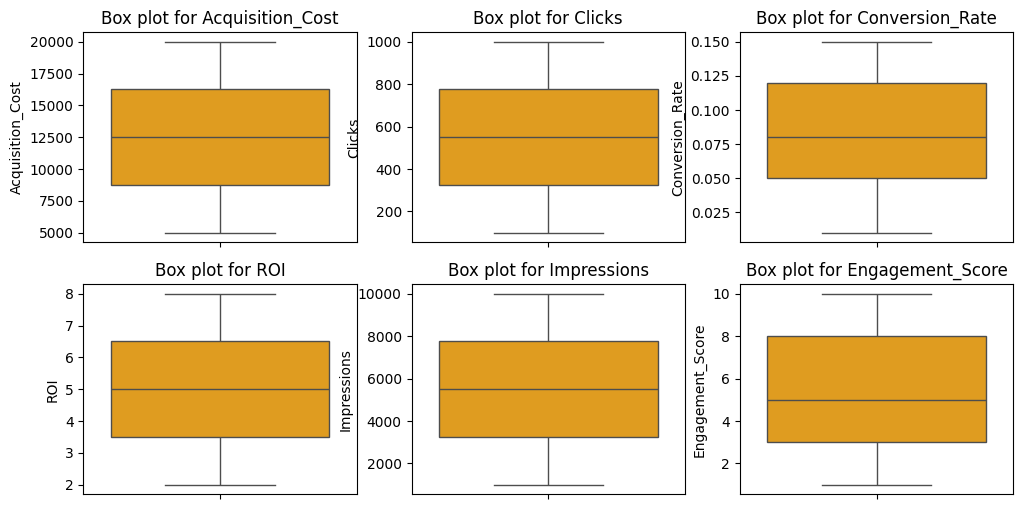

In [48]:
#Identifying the Outlier
plt.figure(figsize=(12, 6))
columns = ["Acquisition_Cost", "Clicks", "Conversion_Rate", "ROI", "Impressions", "Engagement_Score"]
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y = data[col], color = "orange")
    plt.title(f"Box plot for {col}")
plt.show()

In [10]:
# Data Cleaning
# Convert necessary columns to numeric
data['Acquisition_Cost'] = data['Acquisition_Cost'].str.replace(',', '').str.replace('$', '')
data['Acquisition_Cost'] = data['Acquisition_Cost'].astype(float).astype(int)
data['Acquisition_Cost']

0         16174
1         11566
2         10200
3         12724
4         16452
          ...  
200000    18365
200001     8168
200002    13397
200003    18508
200004    13835
Name: Acquisition_Cost, Length: 200005, dtype: int64

In [11]:
data.head(10)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174,6.29,Chicago,1/1/2021,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566,5.61,New York,1/2/2021,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200,7.18,Los Angeles,1/3/2021,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724,5.55,Miami,1/4/2021,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452,6.50,Los Angeles,1/5/2021,379,4201,3,Health & Wellness
5,6,DataTech Solutions,Display,All Ages,15 days,Instagram,0.07,9716,4.36,New York,1/6/2021,100,1643,1,Foodies
6,7,NexGen Systems,Email,Women 35-44,60 days,Website,0.13,11067,2.86,Los Angeles,1/7/2021,817,8749,10,Tech Enthusiasts
7,8,DataTech Solutions,Search,Men 18-24,45 days,Google Ads,0.08,13280,5.55,Los Angeles,1/8/2021,624,7854,7,Outdoor Adventurers
8,9,Alpha Innovations,Social Media,Women 35-44,15 days,Facebook,0.09,18066,6.73,Chicago,1/9/2021,861,1754,6,Tech Enthusiasts
9,10,TechCorp,Email,Women 35-44,15 days,Instagram,0.09,13766,3.78,Los Angeles,1/10/2021,642,3856,3,Tech Enthusiasts


In [12]:
#Change date to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Date']

0        2021-01-01
1        2021-02-01
2        2021-03-01
3        2021-04-01
4        2021-05-01
            ...    
200000   2021-07-12
200001   2021-08-12
200002   2021-09-12
200003   2021-10-12
200004   2021-11-12
Name: Date, Length: 200005, dtype: datetime64[ns]

In [13]:
# Change Duration from Object to numeric
data['Duration'] = data['Duration'].str.replace("days",'')
data['Duration']

0         30 
1         60 
2         30 
3         60 
4         15 
         ... 
200000    30 
200001    15 
200002    45 
200003    30 
200004    45 
Name: Duration, Length: 200005, dtype: object

In [14]:
# Calculate for new metrics
# Calculate for click through rate
data['CTR'] = (data['Clicks'] / data['Impressions']) * 100
data.head(10)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment,CTR
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,16174,6.29,Chicago,2021-01-01,506,1922,6,Health & Wellness,26.326743
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.12,11566,5.61,New York,2021-02-01,116,7523,7,Fashionistas,1.541938
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.07,10200,7.18,Los Angeles,2021-03-01,584,7698,1,Outdoor Adventurers,7.586386
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.11,12724,5.55,Miami,2021-04-01,217,1820,7,Health & Wellness,11.923077
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.05,16452,6.50,Los Angeles,2021-05-01,379,4201,3,Health & Wellness,9.021662
5,6,DataTech Solutions,Display,All Ages,15,Instagram,0.07,9716,4.36,New York,2021-06-01,100,1643,1,Foodies,6.086427
6,7,NexGen Systems,Email,Women 35-44,60,Website,0.13,11067,2.86,Los Angeles,2021-07-01,817,8749,10,Tech Enthusiasts,9.338210
7,8,DataTech Solutions,Search,Men 18-24,45,Google Ads,0.08,13280,5.55,Los Angeles,2021-08-01,624,7854,7,Outdoor Adventurers,7.944996
8,9,Alpha Innovations,Social Media,Women 35-44,15,Facebook,0.09,18066,6.73,Chicago,2021-09-01,861,1754,6,Tech Enthusiasts,49.087799
9,10,TechCorp,Email,Women 35-44,15,Instagram,0.09,13766,3.78,Los Angeles,2021-10-01,642,3856,3,Tech Enthusiasts,16.649378


In [15]:
#Calculate for new metrics
data['CPC'] = data['Acquisition_Cost'] / data['Clicks']
data['CPC'] 

0         31.964427
1         99.706897
2         17.465753
3         58.635945
4         43.408971
            ...    
200000    21.404429
200001    35.824561
200002    18.529737
200003    35.053030
200004    14.972944
Name: CPC, Length: 200005, dtype: float64

In [16]:
# Calculate the average ROI
average_roi = data['ROI'].mean()

# Classify campaigns as High-Performing or Underperforming
data['Performance'] = data['ROI'].apply(lambda x: 'High-Performing' if x > average_roi else 'Underperforming')

# Display the classified campaigns
data[['Campaign_ID', 'Company', 'ROI', 'Performance']]

,Campaign_ID,Company,ROI,Performance
0,1,Innovate Industries,6.29,High-Performing
1,2,NexGen Systems,5.61,High-Performing
2,3,Alpha Innovations,7.18,High-Performing
3,4,DataTech Solutions,5.55,High-Performing
4,5,NexGen Systems,6.50,High-Performing
...,...,...,...,...
200000,200001,TechCorp,2.84,Underperforming
200001,200002,DataTech Solutions,4.14,Underperforming
200002,200003,DataTech Solutions,3.25,Underperforming
200003,200004,Innovate Industries,3.86,Underperforming


In [18]:
#Grouping data using groupby
data.groupby("Campaign_Type")[["CTR", "CPC", "Conversion_Rate", "ROI"]].mean()

,CTR,CPC,Conversion_Rate,ROI
Campaign_Type,,,,
Display,14.126483,31.923411,0.080088,5.006497
Email,13.948757,32.039734,0.079787,4.994274
Influencer,14.030083,32.102645,0.080315,5.011040
Search,13.993587,31.960865,0.080021,5.008357
Social Media,14.103856,32.014830,0.080132,4.991781


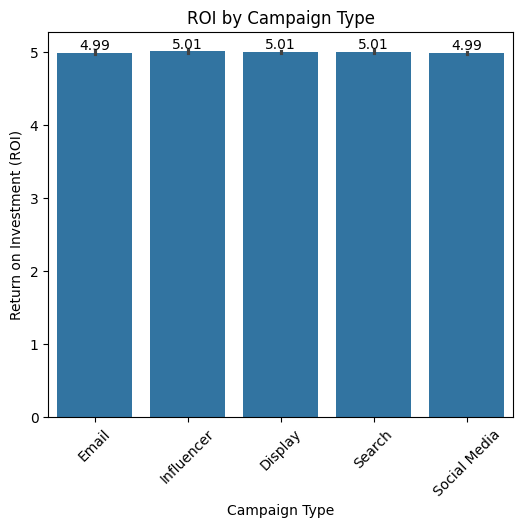

In [34]:
#To plot a bar chart,
plt.figure(figsize=(6, 5))
ax = sns.barplot(x='Campaign_Type', y='ROI', data=data, color='#1f77b4')  # Set a specific color

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('ROI by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Return on Investment (ROI)')
plt.xticks(rotation=45)
plt.show()


In [38]:
#To visualize a heatmap by ,
#grouping of data
data.groupby(["Location", "Channel_Used"])[["CTR", "CPC", "Conversion_Rate", "ROI"]].sum()

CTR            CPC  Conversion_Rate  \
Location    Channel_Used                                                 
Chicago     Email         95322.767455  214465.088905           540.28   
            Facebook      91207.092665  212358.964175           531.59   
            Google Ads    91854.104938  213566.400710           528.71   
            Instagram     94867.509972  217304.972778           537.10   
            Website       92568.023679  212548.537034           530.02   
            YouTube       96163.546013  212406.898760           538.57   
Houston     Email         92354.092344  213410.791666           533.56   
            Facebook      94205.906138  207902.952985           518.51   
            Google Ads    93745.844933  216077.352973           539.88   
            Instagram     93176.739134  211712.255221           530.28   
            Website       94251.970713  207676.138285           530.75   
            YouTube       91126.056858  208469.190513           525.07   
Los Angeles Email         93604.292023  215753.267438           535.11   
            Facebook      92132.083509  208208.407166           526.60   
            Google Ads    92160.043150  217006.644475           534.25   
            Instagram     95402.214764  213979.320836           533.15   
            Website       95526.019803  215022.569853           540.99   
            YouTube       93116.787607  211457.197036           526.18   
Miami       Email         95000.164729  215268.964115           542.99   
            Facebook      93608.457232  216913.156841           529.70   
            Google Ads    95594.012317  222228.270138           551.37   
            Instagram     90772.761317  210945.457297           533.63   
            Website       93024.119175  210575.225818           526.07   
            YouTube       96771.473648  218814.929303           539.67   
New York    Email         95928.065122  212287.416411           545.44   
            Facebook      89958.411990  209102.311342           518.87   
            Google Ads    92095.434232  211516.207902           527.03   
            Instagram     93392.022387  217299.590856           533.41   
            Website       94917.904971  214361.677529           547.12   
            YouTube       94323.106113  213183.656680           538.27   

                               ROI  
Location    Channel_Used            
Chicago     Email         33392.23  
            Facebook      33428.73  
            Google Ads    33056.59  
            Instagram     33664.49  
            Website       33197.30  
            YouTube       33387.88  
Houston     Email         33261.94  
            Facebook      32782.14  
            Google Ads    33779.77  
            Instagram     33046.76  
            Website       33109.04  
            YouTube       33060.51  
Los Angeles Email         33473.66  
            Facebook      32779.38  
            Google Ads    33623.16  
            Instagram     33571.99  
            Website       33693.89  
            YouTube       33027.37  
Miami       Email         33901.68  
            Facebook      33313.45  
            Google Ads    34198.41  
            Instagram     32960.09  
            Website       33263.48  
            YouTube       34202.47  
New York    Email         33847.44  
            Facebook      32409.11  
            Google Ads    32646.59  
            Instagram     33339.54  
            Website       34012.14  
            YouTube       33077.07

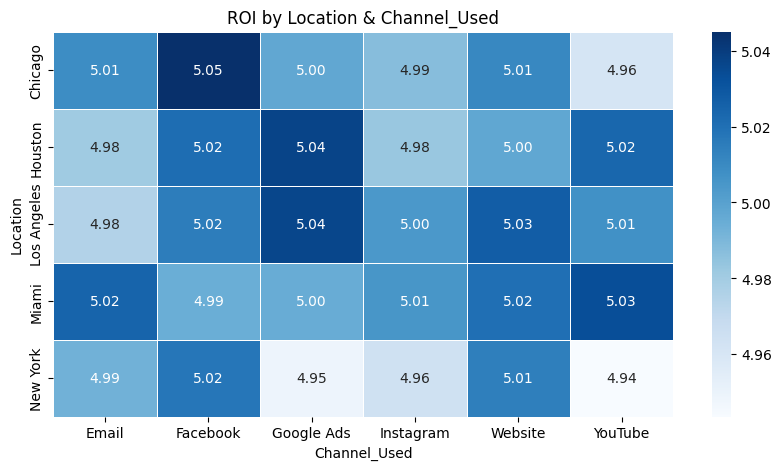

In [49]:
#To plot a heatmap
plt.figure(figsize=(10, 5))
heatmap_data = data.pivot_table(index="Location", columns="Channel_Used", values="ROI", aggfunc="mean")

ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)

plt.title("ROI by Location & Channel_Used")
plt.xlabel("Channel_Used")
plt.ylabel("Location")
plt.show()

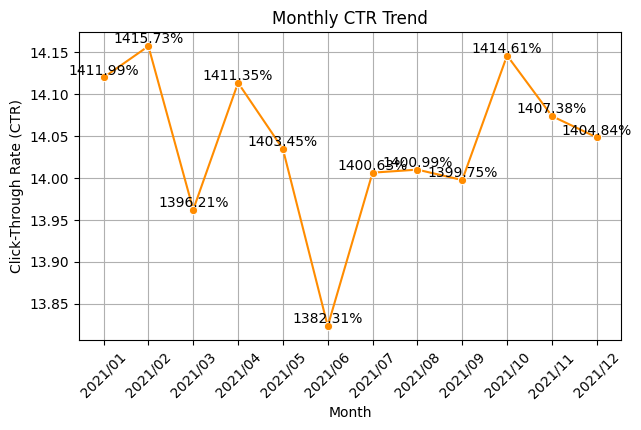

In [50]:
#Grouping and plotting a linechart
data["Month"] = data["Date"].dt.strftime('%Y/%m')  # Extract year-month
monthly_ctr = data.groupby("Month")["CTR"].mean()

plt.figure(figsize=(7, 4))
ax = sns.lineplot(x=monthly_ctr.index, y=monthly_ctr.values, color="darkorange", marker="o")

# Add data labels
for x, y in zip(monthly_ctr.index, monthly_ctr.values):
    plt.text(x, y, f"{y:.2%}", ha='center', va='bottom', fontsize=10, color='black')

plt.title("Monthly CTR Trend")
plt.xlabel("Month")
plt.ylabel("Click-Through Rate (CTR)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


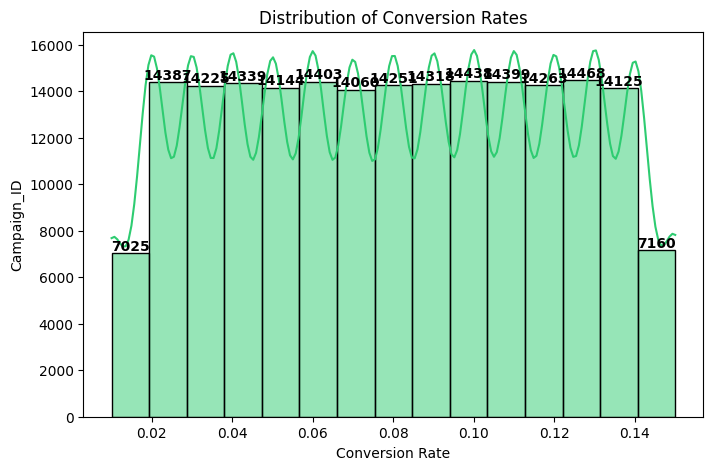

In [28]:
# using histogram to visualize Distribution of Conversion Rate
plt.figure(figsize=(8, 5))
ax = sns.histplot(data["Conversion_Rate"], bins=15, color="#2ecc71", edgecolor="black", kde=True)
plt.title("Distribution of Conversion Rates")
plt.xlabel("Conversion Rate")
plt.ylabel("Campaign_ID")
for p in ax.patches:
    if p.get_height() > 0:  # Avoid labeling bins with zero count )
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')


In [47]:
data.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Date', 'Clicks', 'Impressions', 'Engagement_Score',
       'Customer_Segment', 'CTR', 'CPC', 'Performance', 'Month'],
      dtype='object')